 <span style="color:#42a5f5; font-size:2em; font-weight:bold;">Exploration finale des données d'incidents et visualisation  </span>

 <span style="font-weight:bold">Ce notebook à pour but d'exposer l'EDA ciblée sur les incidents apres une exploration générale !</span>

<span style="color:#e91e63; font-size:1em; font-weight:bold;"> 1. Import des données précedemment chargées et nettoyées</span>

In [166]:
# import des bu 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import warnings
# Supprimer les warnings pour une meilleure lisibilité
warnings.filterwarnings("ignore")

In [177]:
# Charger les données incidents nettoyées depuis un CSV local
print("vérifier le répertoire actuel",os.getcwd())
df_incidents = pd.read_csv("../../data/raw/Cleaned_data/InUSE/cleaned_data_incidents.csv") 
print("les données sont chargées:")
display(df_incidents)

vérifier le répertoire actuel c:\Users\9609241C\london-fire-response\notebooks\exploration
les données sont chargées:


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,NotionalCost,NumCalls
0,235138081.0,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,...,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0
1,1091.0,2009-01-01,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,...,NaN,NaN,NaN,NaN,NaN,NaN,1,60,255,1.0
2,2091.0,2009-01-01,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,...,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0
3,3091.0,2009-01-01,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),...,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60,255,2.0
4,5091.0,2009-01-01,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,...,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60,255,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824968,054201-31032025,2025-03-31,2025,23:39:44,23,False Alarm,AFA,NaN,Non Residential,Shopping Centre,...,264.0,Hammersmith,247.0,Hammersmith,2.0,3.0,3,60,430,2.0
1824969,054203-31032025,2025-03-31,2025,23:40:09,23,Special Service,Special Service,Flooding,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,229.0,Holloway,NaN,NaN,1.0,1.0,1,60,430,1.0
1824970,054204-31032025,2025-03-31,2025,23:42:16,23,Special Service,Special Service,Effecting entry/exit,Dwelling,Licensed House in Multiple Occupation - Up to ...,...,373.0,Harrow,NaN,NaN,1.0,1.0,1,60,430,1.0
1824971,054205-31032025,2025-03-31,2025,23:42:42,23,Fire,Secondary Fire,NaN,Outdoor,Loose refuse,...,367.0,East Ham,412.0,Stratford,2.0,2.0,2,60,430,2.0


<span style="color:#e91e63; font-size:1em; font-weight:bold;"> 3. Nombre d'incidents par an </span>

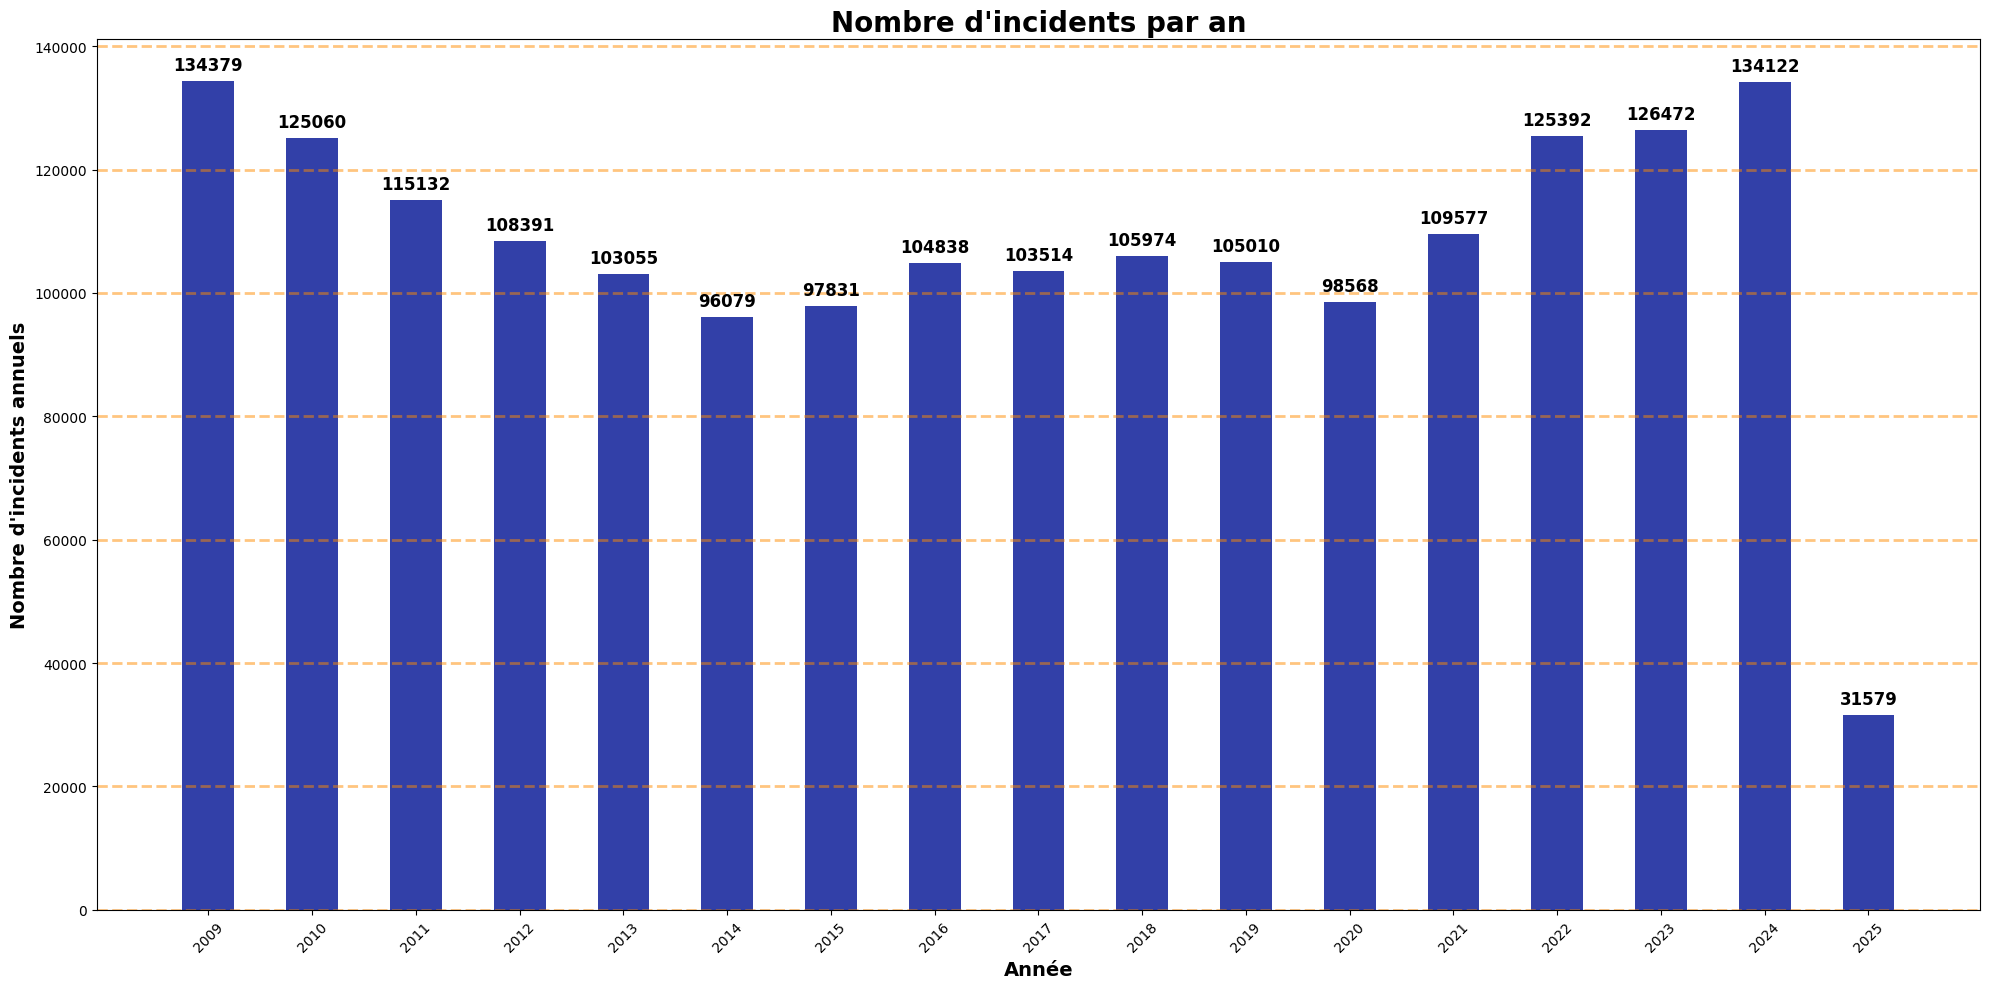

In [168]:
#Nombre d'incidents par an sur les 17 dernieres années:
# Grouper par année et compter le nombre d'incidents
df_incidents_year = df_incidents.groupby("CalYear").size().reset_index(name="count").sort_values("CalYear")

# Visualisation
plt.figure(figsize=(20, 10))
bars = plt.bar(df_incidents_year["CalYear"], df_incidents_year["count"], color="#3240a8", width=0.5)

# Ajout les valeurs au-dessus de chaque barre
for bar in bars:
    height = bar.get_height()
    plt.annotate(f"{int(height):}",
    xy=(bar.get_x() + bar.get_width() / 2, height),
    xytext=(0, 5),
    textcoords="offset points",
    ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Nombre d'incidents par an" ,fontsize=20, fontweight='bold')
plt.xlabel("Année", fontsize=14, fontweight='bold')
plt.ylabel("Nombre d'incidents annuels", fontsize=14, fontweight='bold')
plt.xticks(ticks=df_incidents_year["CalYear"], labels=df_incidents_year["CalYear"], rotation=45)
plt.grid(axis='y', linestyle='dashed', alpha=0.5, color='darkorange', linewidth=2)
plt.tight_layout()
plt.show()

<span style="color:#e91e63; font-size:1em; font-weight:bold;"> 3.Identifier la répartition des incidents en fonction de leur catégogie : Fire, False Alarm, Special service</span>

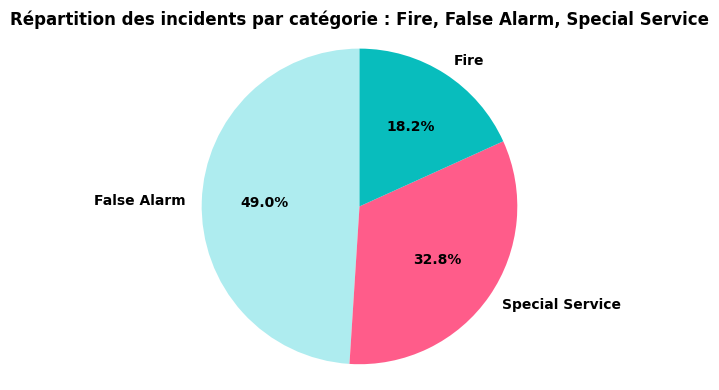

In [169]:
# Répartition du nombre d'incidents par type pour écarter les faux incidents "False Alarm"
# Grouper les incidents par type et compter leur fréquence
df_categories = df_incidents.groupby("IncidentGroup").size().reset_index(name="count").sort_values("count", ascending=False)

colors = ["#aeecef", "#ff5c8a", "#08bdbd"]  

# Tracer le camembert
plt.figure(figsize=(5, 4))  
plt.pie(df_categories["count"],
labels=df_categories["IncidentGroup"],
colors=colors,
autopct="%1.1f%%",
startangle=90,
textprops={'weight': 'bold'})

plt.title("Répartition des incidents par catégorie : Fire, False Alarm, Special Service", fontweight='bold')
plt.axis("equal") 
plt.tight_layout()
plt.show()

==> 49% des cas d'incidents sont de fausses alarm == possibilités de réduire les catégories pour trier les appels et incidents les plus urgents et importants !

<span style="color:#e91e63; font-size:1em; font-weight:bold;"> 4. Vérifier l'evolution des faux appels/alertes </span>

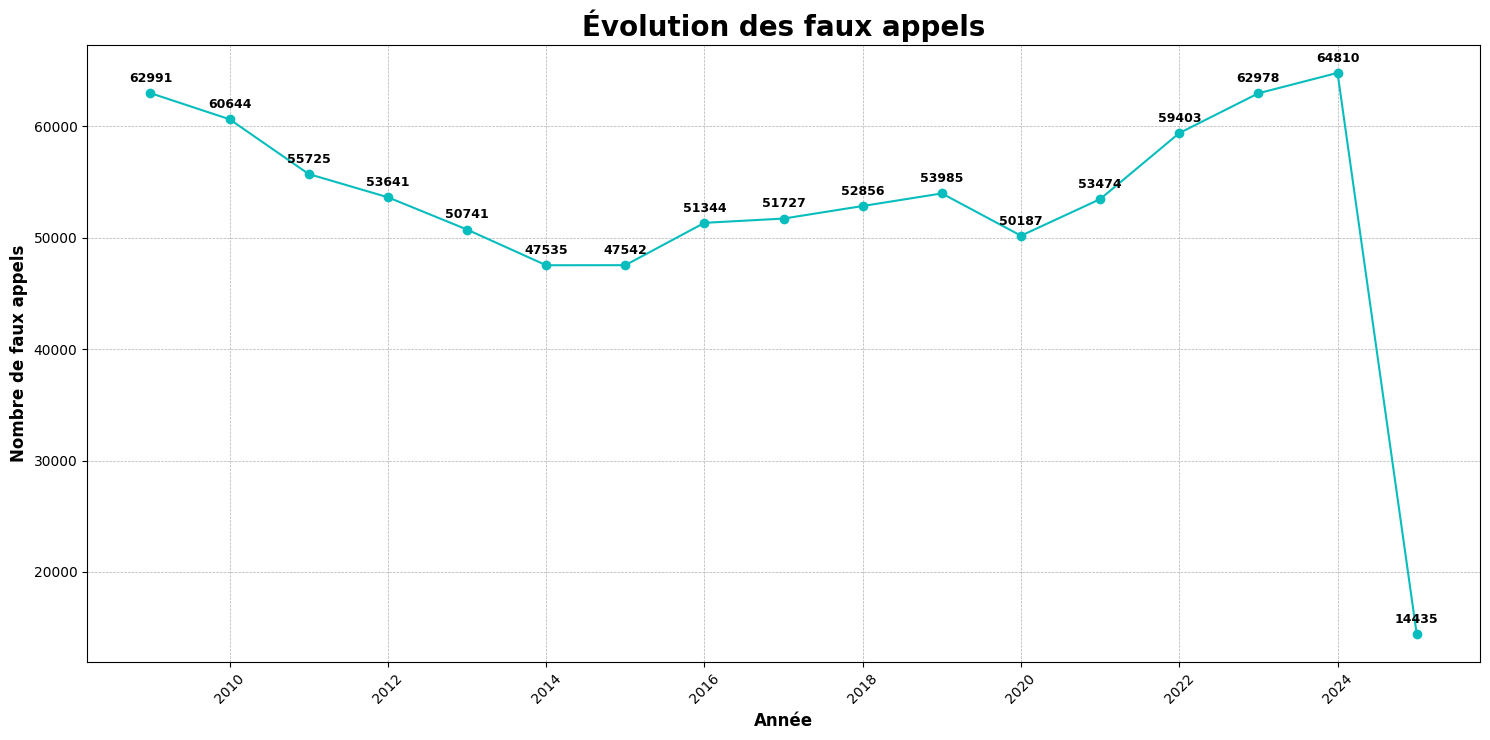

In [170]:
# Filtrer les faux appels 
df_false = df[df["IncidentGroup"] == "False Alarm"]

# Grouper par année et compter
df_false_yearly = df_false.groupby("CalYear").size().reset_index(name="count")

# Tracer l'évolution des faux appels
plt.figure(figsize=(15, 7.5))
plt.plot(df_false_yearly["CalYear"], df_false_yearly["count"], marker="o", linestyle="-", color="#08bdbd")
plt.title("Évolution des faux appels", fontsize=20, fontweight='bold')
plt.xlabel("Année", fontsize=12, fontweight="bold")
plt.ylabel("Nombre de faux appels", fontsize=12,fontweight="bold")
plt.grid(True, linestyle='dashed', linewidth=0.5)
plt.xticks(rotation=45)
# Ajouter les annotations pour chaque point
for i, row in df_false_yearly.iterrows():
    plt.annotate(f"{row['count']:}",  
        (row["CalYear"], row["count"]),
        textcoords="offset points",
        xytext=(0, 8),  
        ha='center',
        fontsize=9,
        fontweight='bold')
plt.tight_layout()
plt.show()

<span style="color:#e91e63; font-size:1em; font-weight:bold;"> 5. Analyse des 15 arrondissements ou il y a le plus d'incidents/interventions</span>

In [171]:
# Obtenir les valeurs distinctes des arrondissements
boroughs_distincts = df["IncGeo_BoroughName"].unique()

# Convertir en DataFrame pour un affichage tabulaire
df_boroughs_distincts = pd.DataFrame(boroughs_distincts, columns=["Arrondissement"])

# Afficher le tableau
print("Tableau des arrondissements distincts :")
display(df_boroughs_distincts)

# Afficher le nombre total
print(f"\nNombre total d'arrondissements distincts : {df_boroughs_distincts.shape[0]}")


Tableau des arrondissements distincts :


,Arrondissement
0,WANDSWORTH
1,LAMBETH
2,ENFIELD
3,HILLINGDON
4,ISLINGTON
5,CAMDEN
6,GREENWICH
7,HOUNSLOW
8,SOUTHWARK
9,HACKNEY



Nombre total d'arrondissements distincts : 33


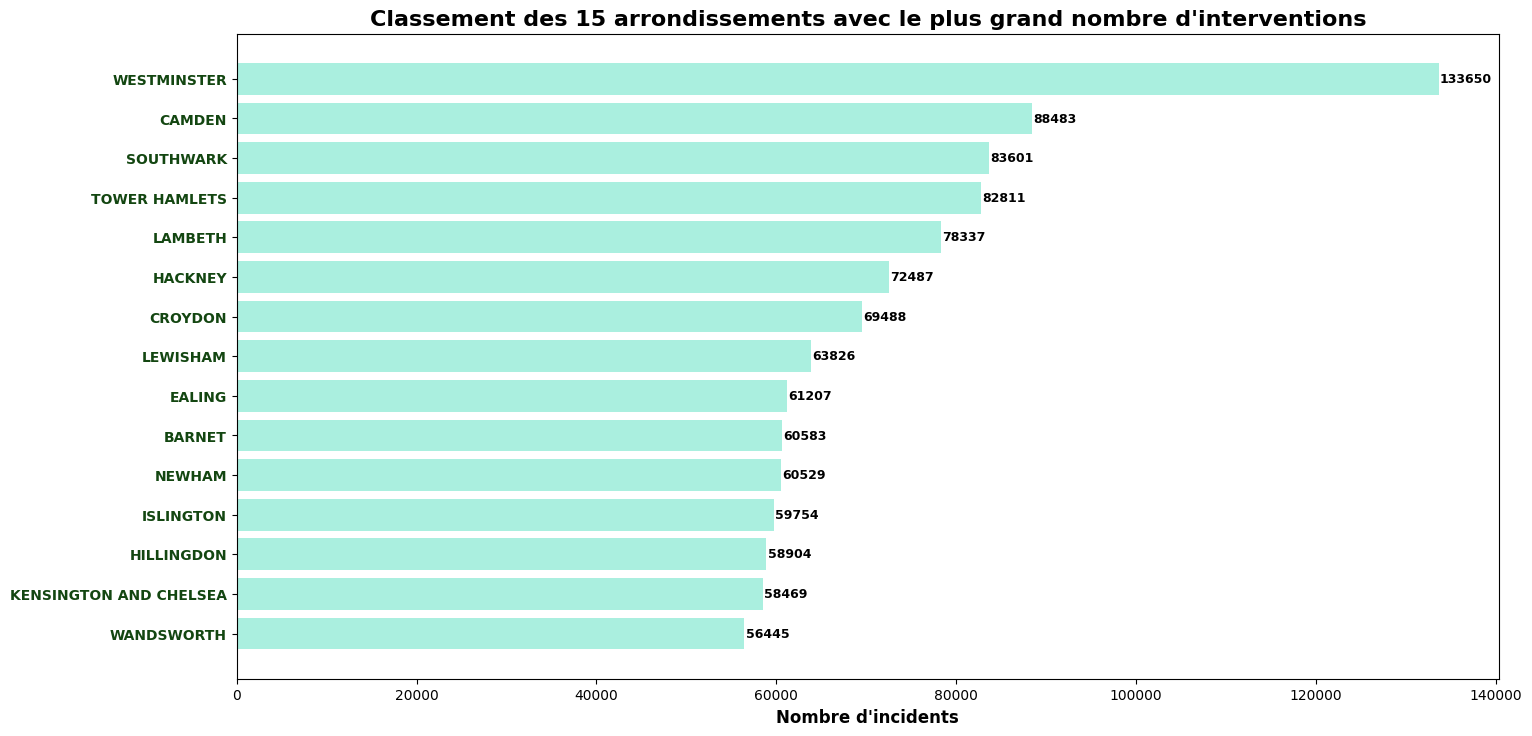

In [172]:
# Grouper par nom de borough et compter le nombre d'incidents, puis prendre les 15 premiers
df_borough = df.groupby("IncGeo_BoroughName").size().reset_index(name="count").sort_values(by="count", ascending=False).head(15)

# Tracer un histogramme horizontal avec une taille de figure plus grande
plt.figure(figsize=(16, 8))
bars = plt.barh(df_borough["IncGeo_BoroughName"], df_borough["count"], color="#aaefdf")

plt.xlabel("Nombre d'incidents", fontsize=12, fontweight='bold')
plt.title("Classement des 15 arrondissements avec le plus grand nombre d'interventions", fontsize=16, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold', color="#134611")
plt.gca().invert_yaxis()
# Ajouter le nombre d'incidents au bout de chaque barre
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(df_borough["count"]) * 0.001, 
    bar.get_y() + bar.get_height()/2,
    f"{int(width)}",
    fontsize=9,
    fontweight='bold',
    va='center')

plt.subplots_adjust(right=0.45)  
plt.tight_layout(pad=3)  
plt.show()


<span style="color:#e91e63; font-size:1em; font-weight:bold;"> 6.Délai moyen d’arrivée du premier camion et distribution des temps d’intervention </span>



In [173]:
# Calcul du délai moyen d'arrivée du 1er camion
avg_delay = df["FirstPumpArriving_AttendanceTime"].mean()

# Affichage formaté
print(f"Délai moyen du 1er camion : {avg_delay:.2f} secondes")


Délai moyen du 1er camion : 318.40 secondes


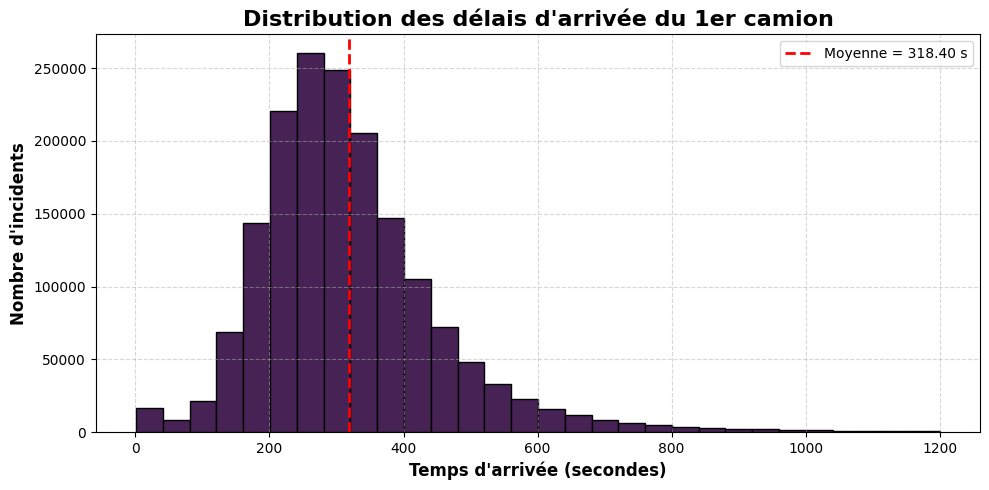

In [174]:
# Visualisation de la distribution des délais d'arrivée
plt.figure(figsize=(10, 5))

# Récupérer les valeurs de l'histogramme
counts, bins, patches = plt.hist(df["FirstPumpArriving_AttendanceTime"],bins=30,color="#462255",edgecolor="black")

# Afficher la ligne de la moyenne
plt.axvline(avg_delay, color='red', linestyle='dashed', linewidth=2, label=f"Moyenne = {avg_delay:.2f} s")

# Mise en forme du graphique
plt.title("Distribution des délais d'arrivée du 1er camion", fontsize=16, fontweight='bold')
plt.xlabel("Temps d'arrivée (secondes)", fontsize=12, fontweight='bold')
plt.ylabel("Nombre d'incidents", fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<span style="color:#e91e63; font-size:1em; font-weight:bold;">  7.Délai moyen d’arrivée du premier camion par type d’incident </span>



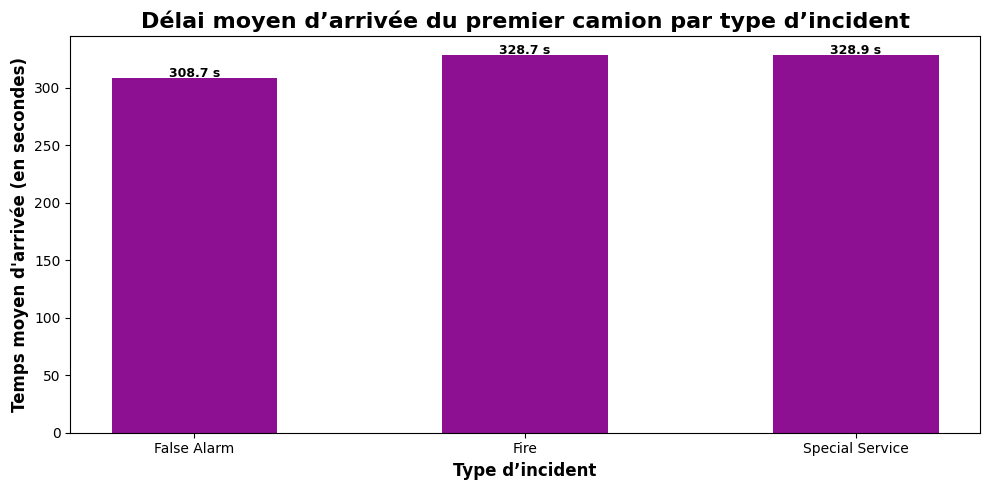

In [175]:
# Calcul du délai moyen par type d'incident
avg_delay_by_type = df.groupby("IncidentGroup")["FirstPumpArriving_AttendanceTime"].mean().reset_index()

# Tracé
plt.figure(figsize=(10, 5))
bars = plt.bar(avg_delay_by_type["IncidentGroup"], avg_delay_by_type["FirstPumpArriving_AttendanceTime"], color="#8e1092", width=0.5)

# Annoter les valeurs
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f} s", ha='center', fontsize=9, fontweight='bold')

plt.title("Délai moyen d’arrivée du premier camion par type d’incident", fontsize=16, fontweight='bold')
plt.xlabel("Type d’incident", fontsize=12,fontweight='bold')
plt.ylabel("Temps moyen d'arrivée (en secondes)", fontsize=12,fontweight='bold')
plt.tight_layout()
plt.show()


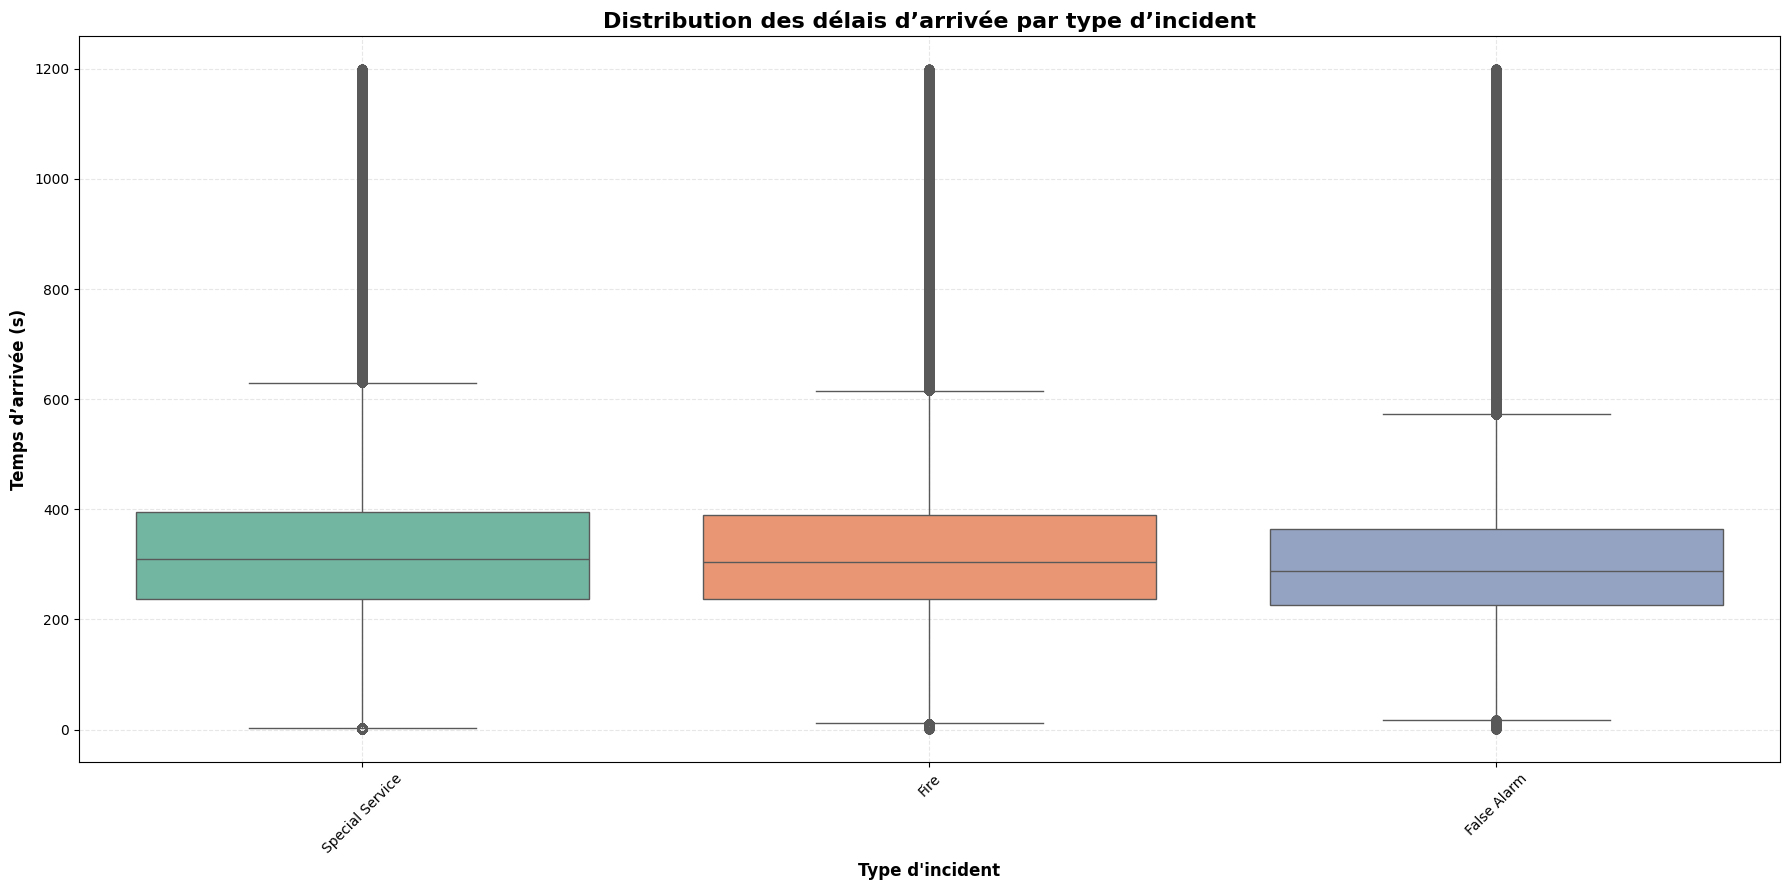

In [176]:
# Visualisation en boxplot (Boîte à moustaches)
plt.figure(figsize=(18, 9))
sns.boxplot(x="IncidentGroup", y="FirstPumpArriving_AttendanceTime", data=df, palette="Set2")
plt.title("Distribution des délais d’arrivée par type d’incident", fontsize=16, fontweight='bold')
plt.xlabel("Type d'incident", fontsize=12, fontweight='bold')
plt.ylabel("Temps d’arrivée (s)", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

En somme, ce boxplot montre  que les pompiers sont rapides peu importe le type d'incidents meme dans les cas des fausse alarme. Pour les feux, ils sont tt ausii efficace idem pour les ("services spéciaux"), où l'accès peut être plus complexe: false Alarm > Fire> Special Service

In [178]:
print(df_incidents.columns)

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode',
       'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardCode',
       'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m',
       'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude', 'FRS',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpMinutesRounded', 'NotionalCost', 'NumCalls'],
      dtype='object')


colonnes à garder : 